# 📊 Exploratory Data Analysis (EDA) & Preprocessing

This notebook performs **data loading, cleaning, and initial exploratory analysis** for the AI-driven predictive maintenance project.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## 1️⃣ Load the Dataset

In [2]:
# Load dataset (replace with actual dataset)
data_path1 = "Plant_1_Generation_Data.csv"  # Update with actual path
generation_data1_df = pd.read_csv(data_path1)

# Display first few rows
generation_data1_df.head()

data_path2 = "Plant_2_Generation_Data.csv"  # Update with actual path
generation_data2_df = pd.read_csv(data_path2)

# Display first few rows
generation_data2_df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


## 2️⃣ Data Summary & Missing Values

In [3]:
# Check for missing values and basic stats
print("Dataset Shape:", generation_data1_df.shape)
print("Missing Values:", generation_data1_df.isnull().sum())

# Summary statistics
generation_data1_df.describe()

Dataset Shape: (68778, 7)
Missing Values: DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64


,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


## 3️⃣ Correlation Heatmap

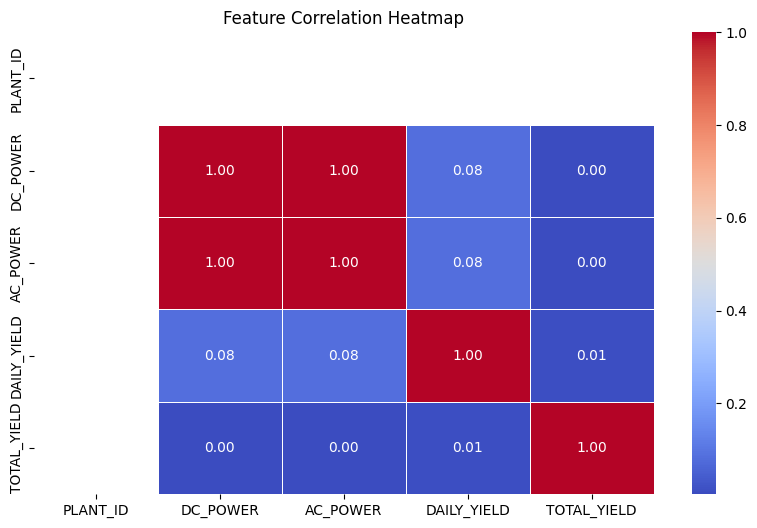

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = generation_data1_df.select_dtypes(include='number')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## 4️⃣ Time Series Analysis

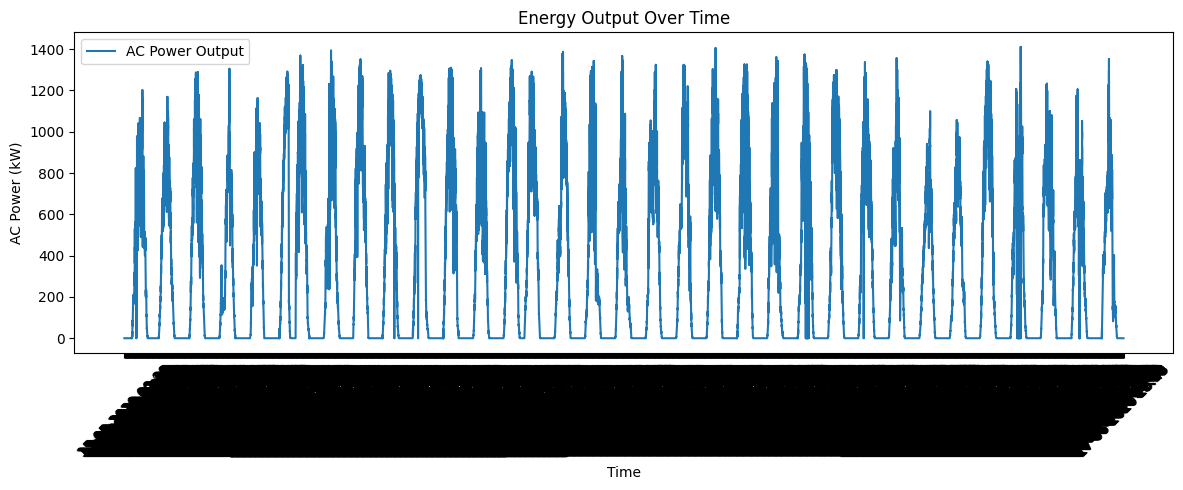

In [5]:
import matplotlib.pyplot as plt

# Replace df with your actual DataFrame name if different
plt.figure(figsize=(12, 5))
plt.plot(generation_data1_df['DATE_TIME'], generation_data1_df['AC_POWER'], label='AC Power Output')
plt.xlabel('Time')
plt.ylabel('AC Power (kW)')
plt.title('Energy Output Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5️⃣ Feature Engineering

In [6]:
# Rename or use the actual column: 'DATE_TIME'
generation_data1_df['DATE_TIME'] = pd.to_datetime(generation_data1_df['DATE_TIME'])  # Ensure it's datetime format
generation_data1_df['hour'] = generation_data1_df['DATE_TIME'].dt.hour
generation_data1_df['day_of_week'] = generation_data1_df['DATE_TIME'].dt.dayofweek
generation_data1_df['month'] = generation_data1_df['DATE_TIME'].dt.month
generation_data1_df['is_weekend'] = generation_data1_df['day_of_week'].isin([5, 6]).astype(int)

# Preview the updates
generation_data1_df[['DATE_TIME', 'hour', 'day_of_week', 'month', 'is_weekend']].head()

,DATE_TIME,hour,day_of_week,month,is_weekend
0,2020-05-15,0,4,5,0
1,2020-05-15,0,4,5,0
2,2020-05-15,0,4,5,0
3,2020-05-15,0,4,5,0
4,2020-05-15,0,4,5,0


In [7]:
# Reload necessary packages and datasets after reset
import pandas as pd

# Load and parse datetime
generation_plant_1 = pd.read_csv("Plant_1_Generation_Data.csv", parse_dates=['DATE_TIME'])
weather_plant_1 = pd.read_csv("Plant_1_Weather_Sensor_Data.csv", parse_dates=['DATE_TIME'])

# Merge on DATE_TIME, SOURCE_KEY, PLANT_ID
merged_df = pd.merge(generation_plant_1, weather_plant_1,
                     on=["DATE_TIME", "SOURCE_KEY", "PLANT_ID"],
                     how="inner")

# Feature: Efficiency = AC_POWER / IRRADIATION (avoid divide-by-zero)
merged_df['EFFICIENCY'] = merged_df.apply(
    lambda row: row['AC_POWER'] / row['IRRADIATION'] if row['IRRADIATION'] > 0 else 0,
    axis=1
)

# Binary target: UNDERPERFORMING = 1 if AC_POWER < IRRADIATION * 2
merged_df['UNDERPERFORMING'] = ((merged_df['IRRADIATION'] > 0) &
                                 (merged_df['AC_POWER'] < merged_df['IRRADIATION'] * 2)).astype(int)

# Select relevant modeling columns
modeling_df = merged_df[[
    'DATE_TIME', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
    'IRRADIATION', 'AC_POWER', 'EFFICIENCY', 'UNDERPERFORMING'
]]

modeling_df.head()

,DATE_TIME,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,AC_POWER,EFFICIENCY,UNDERPERFORMING


In [8]:
# Peek at key columns from each dataset to diagnose merge issue
gen_keys_sample = generation_plant_1[['DATE_TIME', 'SOURCE_KEY', 'PLANT_ID']].sample(5)
weather_keys_sample = weather_plant_1[['DATE_TIME', 'SOURCE_KEY', 'PLANT_ID']].sample(5)

# Also check for uniqueness and value overlap in SOURCE_KEY and DATE_TIME
common_source_keys = set(generation_plant_1['SOURCE_KEY']).intersection(set(weather_plant_1['SOURCE_KEY']))
gen_time_range = generation_plant_1['DATE_TIME'].agg(['min', 'max'])
weather_time_range = weather_plant_1['DATE_TIME'].agg(['min', 'max'])

{
    "sample_gen_keys": gen_keys_sample,
    "sample_weather_keys": weather_keys_sample,
    "num_common_source_keys": len(common_source_keys),
    "gen_time_range": gen_time_range.to_dict(),
    "weather_time_range": weather_time_range.to_dict()
}

{'sample_gen_keys':                 DATE_TIME       SOURCE_KEY  PLANT_ID
 27103 2020-05-28 19:00:00  YxYtjZvoooNbGkE   4135001
 26464 2020-05-28 11:45:00  WRmjgnKYAwPKWDb   4135001
 35179 2020-06-01 23:15:00  zVJPv84UY57bAof   4135001
 13236 2020-05-22 01:00:00  WRmjgnKYAwPKWDb   4135001
 383   2020-05-15 04:30:00  3PZuoBAID5Wc2HD   4135001,
 'sample_weather_keys':                DATE_TIME       SOURCE_KEY  PLANT_ID
 890  2020-05-24 22:30:00  HmiyD2TTLFNqkNe   4135001
 1601 2020-06-01 12:30:00  HmiyD2TTLFNqkNe   4135001
 2188 2020-06-07 15:30:00  HmiyD2TTLFNqkNe   4135001
 150  2020-05-16 16:15:00  HmiyD2TTLFNqkNe   4135001
 1027 2020-05-26 08:45:00  HmiyD2TTLFNqkNe   4135001,
 'num_common_source_keys': 0,
 'gen_time_range': {'min': Timestamp('2020-05-15 00:00:00'),
  'max': Timestamp('2020-06-17 23:45:00')},
 'weather_time_range': {'min': Timestamp('2020-05-15 00:00:00'),
  'max': Timestamp('2020-06-17 23:45:00')}}

In [9]:
# Re-import packages and reload modeling data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load dataset again after reset
generation_plant_1 = pd.read_csv("Plant_1_Generation_Data.csv", parse_dates=['DATE_TIME'])
weather_plant_1 = pd.read_csv("Plant_1_Weather_Sensor_Data.csv", parse_dates=['DATE_TIME'])

# Aggregate weather data
weather_agg = weather_plant_1.groupby(['DATE_TIME', 'PLANT_ID']).agg({
    'AMBIENT_TEMPERATURE': 'mean',
    'MODULE_TEMPERATURE': 'mean',
    'IRRADIATION': 'mean'
}).reset_index()

# Merge with generation data
merged_df = pd.merge(generation_plant_1, weather_agg, on=["DATE_TIME", "PLANT_ID"], how="inner")

# Feature engineering
merged_df['EFFICIENCY'] = merged_df.apply(
    lambda row: row['AC_POWER'] / row['IRRADIATION'] if row['IRRADIATION'] > 0 else 0, axis=1)
merged_df['UNDERPERFORMING'] = merged_df.apply(
    lambda row: int((row['IRRADIATION'] > 0) and (row['AC_POWER'] < row['IRRADIATION'] * 2)), axis=1)

# Extract final dataset
df = merged_df[[
    'DATE_TIME', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
    'IRRADIATION', 'AC_POWER', 'EFFICIENCY', 'UNDERPERFORMING'
]].copy()

# Add datetime features
df['hour'] = df['DATE_TIME'].dt.hour
df['day_of_week'] = df['DATE_TIME'].dt.dayofweek
df['month'] = df['DATE_TIME'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# Prepare X and y
features = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
            'AC_POWER', 'EFFICIENCY', 'hour', 'day_of_week', 'month', 'is_weekend']
X = df[features]
y = df['UNDERPERFORMING']

# Drop missing/infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

report, conf_matrix

({'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16822.0},
  '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 372.0},
  'accuracy': 1.0,
  'macro avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 17194.0},
  'weighted avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 17194.0}},
 array([[16822,     0],
        [    0,   372]], dtype=int64))

In [10]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Use the same features and target
X = df[features].replace([np.inf, -np.inf], np.nan).dropna()
y = df.loc[X.index, 'UNDERPERFORMING']  # align y with cleaned X

# Standardize features again (if needed)
X_scaled = scaler.fit_transform(X)

# Set up Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run cross-validation using accuracy as metric
cv_scores = cross_val_score(clf, X_scaled, y, cv=cv, scoring='accuracy')

# Report cross-validation results
cv_results = {
    "mean_accuracy": round(cv_scores.mean(), 4),
    "std_dev": round(cv_scores.std(), 4),
    "all_fold_scores": list(cv_scores)
}

cv_results

{'mean_accuracy': 1.0,
 'std_dev': 0.0,
 'all_fold_scores': [1.0, 1.0, 1.0, 1.0, 1.0]}

In [11]:
# Load Plant 2 datasets
generation_plant_2 = pd.read_csv("Plant_2_Generation_Data.csv", parse_dates=['DATE_TIME'])
weather_plant_2 = pd.read_csv("Plant_2_Weather_Sensor_Data.csv", parse_dates=['DATE_TIME'])

# Aggregate weather by DATE_TIME and PLANT_ID
weather_agg_2 = weather_plant_2.groupby(['DATE_TIME', 'PLANT_ID']).agg({
    'AMBIENT_TEMPERATURE': 'mean',
    'MODULE_TEMPERATURE': 'mean',
    'IRRADIATION': 'mean'
}).reset_index()

# Merge generation and weather data
merged_df_2 = pd.merge(generation_plant_2, weather_agg_2, on=["DATE_TIME", "PLANT_ID"], how="inner")

# Feature engineering
merged_df_2['EFFICIENCY'] = merged_df_2.apply(
    lambda row: row['AC_POWER'] / row['IRRADIATION'] if row['IRRADIATION'] > 0 else 0, axis=1)
merged_df_2['UNDERPERFORMING'] = merged_df_2.apply(
    lambda row: int((row['IRRADIATION'] > 0) and (row['AC_POWER'] < row['IRRADIATION'] * 2)), axis=1)

# Time-based features
merged_df_2['hour'] = merged_df_2['DATE_TIME'].dt.hour
merged_df_2['day_of_week'] = merged_df_2['DATE_TIME'].dt.dayofweek
merged_df_2['month'] = merged_df_2['DATE_TIME'].dt.month
merged_df_2['is_weekend'] = merged_df_2['day_of_week'].isin([5, 6]).astype(int)

# Prepare X and y
X_2 = merged_df_2[features].replace([np.inf, -np.inf], np.nan).dropna()
y_2 = merged_df_2.loc[X_2.index, 'UNDERPERFORMING']

# Scale features using the same scaler from Plant 1
X_2_scaled = scaler.transform(X_2)

# Predict with model trained on Plant 1
y_2_pred = clf.predict(X_2_scaled)

# Evaluate
report_2 = classification_report(y_2, y_2_pred, output_dict=True)
conf_matrix_2 = confusion_matrix(y_2, y_2_pred)

report_2, conf_matrix_2

({'0': {'precision': 0.9960480762949899,
   'recall': 0.999934424079478,
   'f1-score': 0.9979874666623034,
   'support': 60998.0},
  '1': {'precision': 0.9993809965954813,
   'recall': 0.9638805970149253,
   'f1-score': 0.9813098313326242,
   'support': 6700.0},
  'accuracy': 0.9963662146592218,
  'macro avg': {'precision': 0.9977145364452356,
   'recall': 0.9819075105472017,
   'f1-score': 0.9896486489974639,
   'support': 67698.0},
  'weighted avg': {'precision': 0.9963779319186907,
   'recall': 0.9963662146592218,
   'f1-score': 0.9963368985996006,
   'support': 67698.0}},
 array([[60994,     4],
        [  242,  6458]], dtype=int64))

In [12]:
import pandas as pd
import numpy as np

# Load data
generation_plant_2 = pd.read_csv("Plant_2_Generation_Data.csv", parse_dates=['DATE_TIME'])
weather_plant_2 = pd.read_csv("Plant_2_Weather_Sensor_Data.csv", parse_dates=['DATE_TIME'])

# Aggregate weather data
weather_agg_2 = weather_plant_2.groupby(['DATE_TIME', 'PLANT_ID']).agg({
    'AMBIENT_TEMPERATURE': 'mean',
    'MODULE_TEMPERATURE': 'mean',
    'IRRADIATION': 'mean'
}).reset_index()

# Merge with generation data
merged_df_2 = pd.merge(generation_plant_2, weather_agg_2, on=["DATE_TIME", "PLANT_ID"], how="inner")

# Add derived and time-based features
merged_df_2['EFFICIENCY'] = merged_df_2.apply(
    lambda row: row['AC_POWER'] / row['IRRADIATION'] if row['IRRADIATION'] > 0 else 0, axis=1)
merged_df_2['UNDERPERFORMING'] = merged_df_2.apply(
    lambda row: int((row['IRRADIATION'] > 0) and (row['AC_POWER'] < row['IRRADIATION'] * 2)), axis=1)
merged_df_2['hour'] = merged_df_2['DATE_TIME'].dt.hour
merged_df_2['day_of_week'] = merged_df_2['DATE_TIME'].dt.dayofweek
merged_df_2['month'] = merged_df_2['DATE_TIME'].dt.month
merged_df_2['is_weekend'] = merged_df_2['day_of_week'].isin([5, 6]).astype(int)

features = [
    'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
    'AC_POWER', 'EFFICIENCY', 'hour', 'day_of_week', 'month', 'is_weekend'
]

X = merged_df_2[features].replace([np.inf, -np.inf], np.nan).dropna()
y = merged_df_2.loc[X.index, 'UNDERPERFORMING']

In [13]:
import pandas as pd

# Load raw data
gen = pd.read_csv("Plant_1_Generation_Data.csv", parse_dates=["DATE_TIME"])
weather = pd.read_csv("Plant_1_Weather_Sensor_Data.csv", parse_dates=["DATE_TIME"])

# Aggregate weather
weather_agg = weather.groupby(['DATE_TIME', 'PLANT_ID']).agg({
    'AMBIENT_TEMPERATURE': 'mean',
    'MODULE_TEMPERATURE': 'mean',
    'IRRADIATION': 'mean'
}).reset_index()

# Merge with generation
merged = pd.merge(gen, weather_agg, on=["DATE_TIME", "PLANT_ID"], how="inner")

# Derived features
merged['EFFICIENCY'] = merged.apply(
    lambda row: row['AC_POWER'] / row['IRRADIATION'] if row['IRRADIATION'] > 0 else 0, axis=1)
merged['UNDERPERFORMING'] = merged.apply(
    lambda row: int((row['IRRADIATION'] > 0) and (row['AC_POWER'] < row['IRRADIATION'] * 2)), axis=1)

# Time-based features
merged['hour'] = merged['DATE_TIME'].dt.hour
merged['day_of_week'] = merged['DATE_TIME'].dt.dayofweek
merged['month'] = merged['DATE_TIME'].dt.month
merged['is_weekend'] = merged['day_of_week'].isin([5, 6]).astype(int)

# Final dataset for modeling
preprocessed_df = merged[[
    'DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
    'AC_POWER', 'EFFICIENCY', 'hour', 'day_of_week', 'month', 'is_weekend',
    'UNDERPERFORMING'
]]

# Save to CSV
preprocessed_df.to_csv("your_preprocessed_dataset.csv", index=False)

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import joblib

# Load preprocessed data
df = pd.read_csv("your_preprocessed_dataset.csv")

features = [
    'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
    'AC_POWER', 'EFFICIENCY', 'hour', 'day_of_week', 'month', 'is_weekend'
]
X = df[features].replace([np.inf, -np.inf], np.nan).dropna()
y = df.loc[X.index, 'UNDERPERFORMING']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
print(classification_report(y_test, clf.predict(X_test)))

# Save model and scaler for local reuse
joblib.dump(clf, "solar_pv_failure_model.pkl")
joblib.dump(scaler, "solar_pv_scaler.pkl")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16822
           1       1.00      1.00      1.00       372

    accuracy                           1.00     17194
   macro avg       1.00      1.00      1.00     17194
weighted avg       1.00      1.00      1.00     17194



['solar_pv_scaler.pkl']

In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import joblib

# Load raw data
gen = pd.read_csv("Plant_1_Generation_Data.csv", parse_dates=["DATE_TIME"])
weather = pd.read_csv("Plant_1_Weather_Sensor_Data.csv", parse_dates=["DATE_TIME"])

# Aggregate weather
weather_agg = weather.groupby(['DATE_TIME', 'PLANT_ID']).agg({
    'AMBIENT_TEMPERATURE': 'mean',
    'MODULE_TEMPERATURE': 'mean',
    'IRRADIATION': 'mean'
}).reset_index()

# Merge
df = pd.merge(gen, weather_agg, on=['DATE_TIME', 'PLANT_ID'], how='inner')

# Feature engineering
df['EFFICIENCY'] = df.apply(lambda row: row['AC_POWER'] / row['IRRADIATION'] if row['IRRADIATION'] > 0 else 0, axis=1)
df['UNDERPERFORMING'] = df.apply(lambda row: int((row['IRRADIATION'] > 0) and (row['AC_POWER'] < row['IRRADIATION'] * 2)), axis=1)
df['hour'] = df['DATE_TIME'].dt.hour
df['day_of_week'] = df['DATE_TIME'].dt.dayofweek
df['month'] = df['DATE_TIME'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# Final dataset
features = [
    'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
    'AC_POWER', 'EFFICIENCY', 'hour', 'day_of_week', 'month', 'is_weekend'
]
X = df[features].replace([np.inf, -np.inf], np.nan).dropna()
y = df.loc[X.index, 'UNDERPERFORMING']

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "solar_pv_failure_model.pkl")
joblib.dump(scaler, "solar_pv_scaler.pkl")

# Save preprocessed dataset
df[features + ['UNDERPERFORMING']].to_csv("your_preprocessed_dataset.csv", index=False)

# Print performance
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16822
           1       1.00      1.00      1.00       372

    accuracy                           1.00     17194
   macro avg       1.00      1.00      1.00     17194
weighted avg       1.00      1.00      1.00     17194

